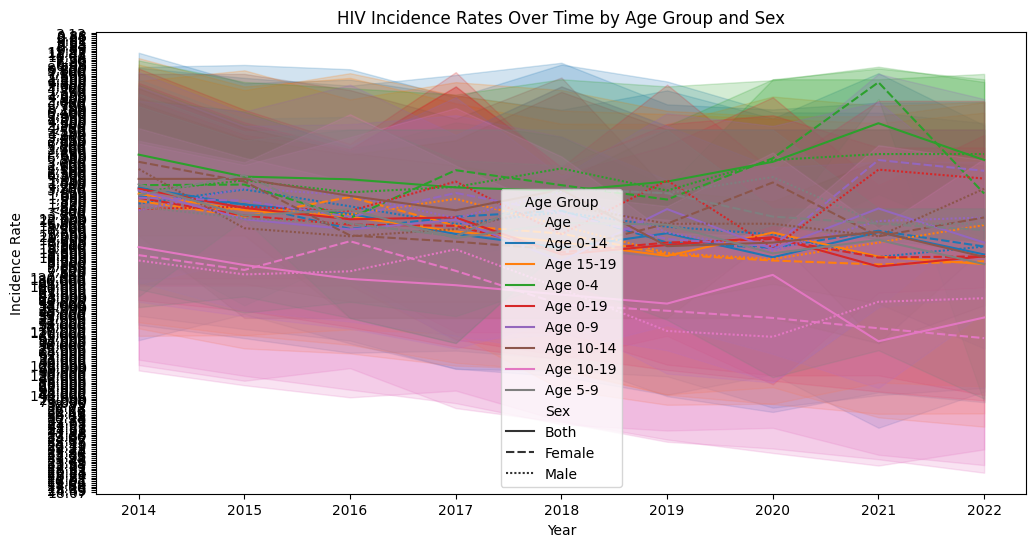

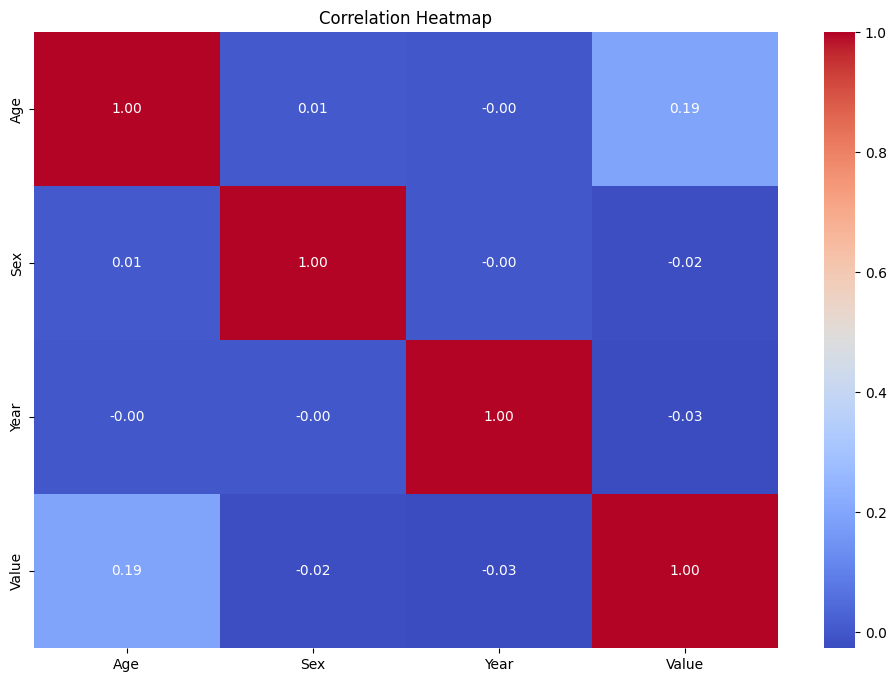

In [12]:
# import required libraries
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Load excel file into panda dataframe
file_path = 'HIV_Epidemiology_Children_Adolescents_2023 (2).xlsx'
df = pd.read_excel(file_path, sheet_name='Data')

# Select data specific to Uganda and within the range of 2014 to 2024
uganda_df = df[(df['Country/Region'] == 'Uganda') & (df['Year'].between(2014, 2024))].copy()

# Visual EDA

# Plot HIV incidence rates over time by age group
plt.figure(figsize=(12, 6))
sns.lineplot(data=uganda_df, x='Year', y='Value', hue='Age', style='Sex')
plt.title('HIV Incidence Rates Over Time by Age Group and Sex')
plt.xlabel('Year')
plt.ylabel('Incidence Rate')
plt.legend(title='Age Group')
plt.show()



# Data Preprocessing
# 1. Handle numerical data
numerical_columns = uganda_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
scaled_values = scaler.fit_transform(uganda_df.loc[:, numerical_columns])
scaled_values = scaled_values.astype(int)  # Explicitly cast to integer
uganda_df.loc[:, numerical_columns] = scaled_values

# 2. Handle categorical data
label_encoder = LabelEncoder()
categorical_columns = ['ISO3', 'Type', 'Country/Region', 'UNICEF Region', 'Indicator', 'Data source', 'Sex', 'Age','Value','Upper','Lower']
for col in categorical_columns:
    uganda_df.loc[:, col] = label_encoder.fit_transform(uganda_df[col])

# Selecting the columns of interest
columns_of_interest = ['Age', 'Sex', 'Year', 'Value']

# Calculating correlation matrix
correlation_matrix = uganda_df[columns_of_interest].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



# Now, the numerical and categorical data in 'uganda_df' are normalized/standardized and encoded, respectively.
uganda_df.to_excel('preprocessed_data.xlsx', index=False)



In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import lightgbm as lgb
import catboost as cb

# Load preprocessed data
preprocessed_data_path = 'preprocessed_data.xlsx'
df = pd.read_excel(preprocessed_data_path)

# Define features (X) and target variable (y)
X = df.drop(columns=['Indicator']) #Drop unrequired columns
y = df['Indicator']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Neural Network': MLPClassifier(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(),
    'LightGBM': lgb.LGBMClassifier(),
    'CatBoost': cb.CatBoostClassifier(silent=True)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
    results[name] = {'Accuracy': accuracy, 'MSE': mse}

# Print results
print("Model Selection Results:")
for name, metrics in results.items():
    print(f"{name}: Accuracy = {metrics['Accuracy']:.4f}, MSE = {metrics['MSE']:.4f}")

# Select the best model based on accuracy
best_model_name = max(results, key=lambda k: results[k]['Accuracy'])
best_model_metrics = results[best_model_name]
print(f"\nBest Model based on Accuracy: {best_model_name}")
print(f"Accuracy: {best_model_metrics['Accuracy']:.4f}, MSE: {best_model_metrics['MSE']:.4f}")

# Select the best model based on MSE
best_model_name_mse = min(results, key=lambda k: results[k]['MSE'])
best_model_metrics_mse = results[best_model_name_mse]
print(f"\nBest Model based on MSE: {best_model_name_mse}")
print(f"Accuracy: {best_model_metrics_mse['Accuracy']:.4f}, MSE: {best_model_metrics_mse['MSE']:.4f}")


c:\Users\AlipMonica\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 520
[LightGBM] [Info] Number of data points in the train set: 590, number of used features: 6
[LightGBM] [Info] Start training from score -2.573460
[LightGBM] [Info] Start training from score -4.588363
[LightGBM] [Info] Start training from score -1.256159
[LightGBM] [Info] Start training from score -1.512588
[LightGBM] [Info] Start training from score -1.215337
[LightGBM] [Info] Start training from score -2.190468
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
import joblib

# Load preprocessed data
preprocessed_data_path = 'preprocessed_data.xlsx'
df = pd.read_excel(preprocessed_data_path)

# Define features (X) and target variable (y)
X = df.drop(columns=['ISO3', 'Type', 'Country/Region', 'UNICEF Region', 'Data source', 'Sex', 'Age','Value','Upper','Lower'])  # Replace 'Target_Column' with the name of your target column
y = df['Indicator']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
model = GradientBoostingClassifier()

# Train the model
model.fit(X_train, y_train)

# Save the trained model
model_file = 'trained_model.pkl'
joblib.dump(model, model_file)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"MSE: {mse:.4f}")


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
import joblib

# Load preprocessed data
preprocessed_data_path = 'preprocessed_data.xlsx'
df = pd.read_excel(preprocessed_data_path)

# Define features (X) and target variable (y)
X = df.drop(columns=['ISO3', 'Type', 'Country/Region', 'UNICEF Region', 'Data source', 'Sex', 'Age','Value','Upper','Lower'])  # Replace 'Target_Column' with the name of your target column
y = df['Indicator']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the trained model
model_file = 'trained_model.pkl'
model = joblib.load(model_file)

# Predict on the test set
y_pred = model.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"MSE: {mse:.4f}")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
import joblib

# Load preprocessed data
preprocessed_data_path = 'preprocessed_data.xlsx'
df = pd.read_excel(preprocessed_data_path)

# Define features (X) and target variable (y)
X = df.drop(columns=['ISO3', 'Type', 'Country/Region', 'UNICEF Region', 'Data source', 'Sex', 'Age','Value','Upper','Lower'])
y = df['Indicator']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the trained model
model_file = 'trained_model.pkl'
model = joblib.load(model_file)

# Predict on the test set
y_pred = model.predict(X_test)

# Save predictions to an Excel file
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions_df.to_excel('test_predictions.xlsx', index=False)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"MSE: {mse:.4f}")
